# 시계열 선 그래프

In [ ]:
import pandas as pd

pop = pd.read_excel('C:/Users/admin/data/전출지_전입지_시도_별_이동자수_20200309092117.xlsx')

pop = pop.fillna(method='ffill') #A열에서 전출지는 행 통합만 안되어있고 비어있는데 이럴 때, 앞의 값으로 채우라는 ffill을 옵션으로 준다.
#print(pop.head())

#전출지별은 서울특별시고 전입지는 서울특별시가 아닌 데이터만 추출하기 위한 조건 생성 : pop
mask = (pop['전출지별'] == '서울특별시') & (pop['전입지별'] != '서울특별시')
#print(pop[mask]) #서울에서 다른지역으로 이동했다는 데이터만 추출해낸것


#전출지는 모두 서울이니까 필요가 없으므로 제거해보자 : pop, drop
df_seoul = pop[mask].drop(['전출지별'],axis=1) #drop은 행단위 제거기 때문에 열을 제거하고자 하는 경우 axis=1 옵션이 필요하다.
#df_seoul = df_seoul.loc[:-3]
#df_seoul = pop[mask].drop(['순이동자수 (명)'], axis=1)
#print(df_seoul)

#전입지별 컬럼이름을 전입지로 수정 : rename
df_seoul.rename({'전입지별':'전입지'},axis=1, inplace=True) #inplace=True를 했으므로 원본을 수정한것

#인덱스를 기존 컬럼이름으로 바꾸고 현재 숫자 인덱스는 제거하기 : set_index
df_seoul.set_index('전입지',inplace=True)
print(df_seoul.head())
print("")

#대구광역시로 전출간 인원에 대한 선 그래프 그리기
sr_one = df_seoul.loc['대구광역시']

import matplotlib.pyplot as plt
plt.plot(sr_one.index,sr_one.values)


#cf. 파이썬에서 그래프에 한글이 안들어가기 때문에 따로 설정을 해주어야 한다!
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
import platform
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    

#스타일 설정 : R에서 했던 ggplot을 이용
plt.style.use('ggplot')
#이미지 사이즈 설정 - 단위는 인치
plt.figure(figsize=(15,10))

#눈금 조정하기
plt.xticks(size=10, rotation='vertical')

#그래프를 그리기
plt.plot(sr_one.index, sr_one.values, marker='o')

#그래프제목
plt.title('From 서울 to 대구')

#축제목 만들기
plt.xlabel('기간', size=10)
plt.ylabel('인구이동', size=10)

#legend 설정
plt.legend(labels=['서울>대구'], loc='best', fontsize=15)

#그래프 위에 글자 작성
#plt.annotate('인구이동 감소', xy=(40,100), rotation=-11, va='baseline', ha='center', fontsize='15')

plt.show()

# subplot

In [ ]:
pop = pd.read_excel('C:/Users/admin/data/시도_별_이동자수.xlsx')
pop = pop.fillna(method='ffill') 
mask = (pop['전출지별']=='부산광역시') & (pop['전입지별']!='부산광역시')
df_bs = pop[mask]
print(df_bs)
#전출지별 컬럼 제거하기
df_bs= df_bs.drop(['전출지별'],axis=1)
print(df_bs)

df_bs = pop[mask].drop(['전출지별'],axis=1)

#컬럼 이름 변경하기
df_bs.rename({'전입지별':'전입지'},axis=1, inplace=True)

#인덱스 설정
df_bs.set_index('전입지',inplace=True)
#print(df_bs)

#부산에서 서울로 이동한 데이터만 가져오기
sr_two = df_bs.loc['서울특별시']
#print(sr_two.head())

#여러개의 그래프를 그리기 위해 그리기 객체를 돌려 받자
fig =plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot(sr_two, marker='o', markersize=5, color='green', linewidth=2, label = '부산시에서 서울로 이동한 인구')

#y축 범위 설정
ax.set_ylim(10000,150000)

#x축 범위 설정
ax.set_xticklabel(sr_two.index,rotation=70)
plt.show()

# 막대그래프

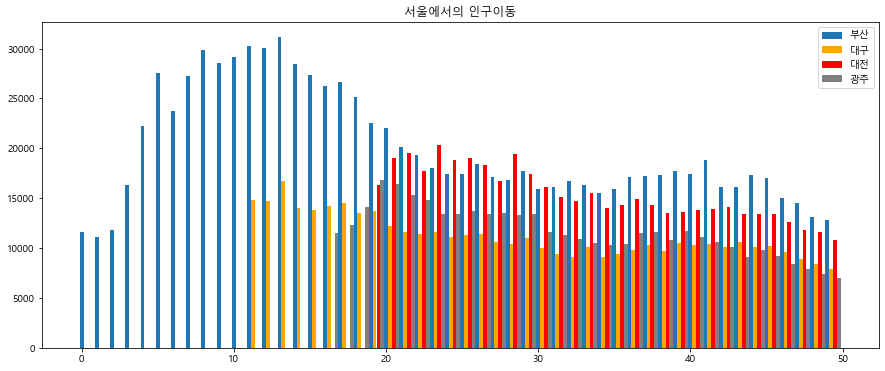

In [49]:
from matplotlib import font_manager, rc
import platform
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#plt.bar(sr_two.index, sr_two, width=1, color='r')

#x축 레이블을 변경하고 싶을 때 (범위를 range로 계산을 먼저해야 함)
#plt.xticks(range(0,len(sr_two),1),sr_two.index,rotation='vertical') 

#서울에서 주요 광역시로 이주 간 인원을 막대 그래프로 비교해보기

import pandas as pd
df = pd.read_excel('data/시도_별_이동자수.xlsx', header=0, fillna=0) #1,시트 읽어오기
df = df.fillna(method='ffill') #2. 셀병합으로 1행에만 데이터가 들어있을 경우 앞의 값으로 다 채워주게 하는 것 (이거안하면 나중에 추출할 때 문제생김)

#3. 필요한 부분만 추출하는 조건 만들기
#이번 task에서는 전출지가 서울이고 전입지가 서울이 아닌 것
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') #3-1 이러면 추출을 하는게 아니고 True, false로 결과를 저장하고 있음

#3-3. True에 해당하는 값만 가져오도록 다시 객체에 할당해 주어야 한다
df_seoul = df[mask] 

#4. 불필요한 부분이 있다면 제거를 해야 함 : 여기선 전출지별이 전부 서울특별시로 나오니까 굳이 필요 없어. (열제거)
df_seoul.drop(['전출지별'],axis=1, inplace=True)
#print(df_seoul)

#cf. 만약 행을 제거해야 한다면 지금같이 인덱스 설정이 안된 경우는 일련번호로 제거하면 됨
#df_seoul.drop([1,2,3,4,5], inplace=True) : axis=0이 기본이니까 안해도 됨

#5. 기존 컬럼을 인덱스로 만들어버리기
df_seoul.set_index(['전입지별'],inplace=True)
#print(df_seoul)

#6. task에 필요하다면 행단위로 추출하기
sr = df_seoul.loc[['부산광역시','대구광역시','인천광역시','광주광역시','대전광역시','울산광역시']]
#print(sr)


#★행과 열의 위치를 바꿔야 하는 경우!!
sr = sr.T

#cf.데이터 모임에 동일한 함수를 적용한 후 결과 만들기 : map
sr.index = sr.index.map(int)
# 위 식은 sr.index에 int라는 함수를 각 요소마다 대입해서 실행을 하고 그 결과를 가지고 다시 데이터 모임을 만들어주는 것

#7. 그래프 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.bar(pd.RangeIndex(0, len(sr.index),1), sr['부산광역시'], width=0.25, label='부산')
plt.bar(pd.RangeIndex(0, len(sr.index),1)+0.25, sr['대구광역시'], width=0.25, color='orange', label='대구')
plt.bar(pd.RangeIndex(0, len(sr.index),1)+0.5, sr['대전광역시'], width=0.25, color='red', label='대전')
plt.bar(pd.RangeIndex(0, len(sr.index),1)+0.75, sr['광주광역시'], width=0.25, color='gray', label='광주')
plt.title('서울에서의 인구이동')
plt.legend()
plt.show()

# 히스토그램

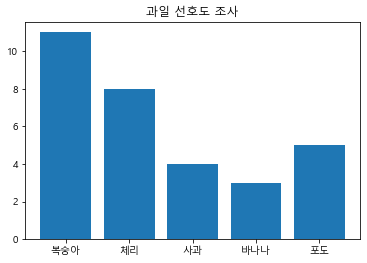

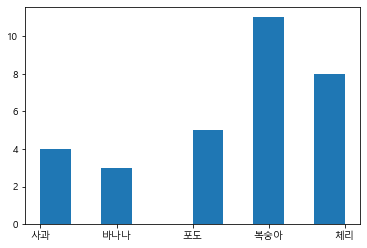

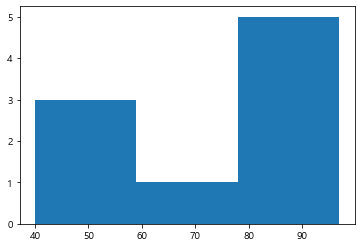

In [75]:
from matplotlib import font_manager, rc
import platform
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#0. 파일을 불러오기 전
# 인덱스는 무엇인지, 컬럼은 어떻게 되어 있는지, 자료구조는 어떤지, 구분자는 무엇인지 파악해보자

fruit = pd.read_csv('./data/lovefruits.csv', encoding='ms949') #'utf-8로는 못하겠는데?'와 같은 디코딩에러가 나면 인코딩이 무엇인지 추적해서 입력해주자
#print(fruit)  : 제대로 읽었는지 확인

#1. 막대그래프를 이용해서 데이터 수 출력하기
data = fruit['선호과일'].value_counts(sort=False) #value_counts만 부르면 자기가 알아서 해당 행의 자료를 카운트함
plt.bar(range(0,len(data),1), data)
plt.xticks(range(0,len(data),1),data.index) #첫번째부터 data의 끝까지 1개씩 data의 인덱스를 넣어줘라
plt.title('과일 선호도 조사')
plt.show()

#2. 1과 같은 작업을 히스토그램으로 해보기
plt.hist(fruit['선호과일']) #2-1. 히스토그램의 경우 카운트를 할 열만 때려 넣어주면 끝
plt.show()

#2-2. 히스토그램은 bins 옵션을 이용해서 구간의 개수를 설정하고 그릴수 있음
# 특히 연속형 데이터라면 구간 설정을 반드시 해야 함

df = pd.read_csv('./data/student.csv', encoding='cp949')
plt.hist(df['수학'], bins=3) #bins로 점수의 범위를 설정해버리는 것 (최소~최대 구간)
plt.show()